In [113]:
import numpy as np
np.random.seed(10)
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [115]:
X, y = make_classification(n_samples=80000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5) 

n_estimator = 10

RF+LR

In [116]:
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lr = LogisticRegression()

In [117]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
res = rf.apply(X_train)

In [119]:
res.shape

(20000, 10)

In [120]:
rf_enc.fit(rf.apply(X_train))

C:\Users\huanglvjun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)

In [121]:
res2 = rf_enc.transform(rf.apply(X_train))

In [122]:
res2.shape

(20000, 80)

In [123]:
rf_lr.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

C:\Users\huanglvjun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
y_pred_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(X_test)))[:,1]

In [125]:
roc_auc_score(y_test, y_pred_rf_lr)

0.9819424750859562

In [126]:
y_pred_rf_lr_c = rf_lr.predict(rf_enc.transform(rf.apply(X_test)))

In [127]:
cm = confusion_matrix(y_test, y_pred_rf_lr_c)

Normalized confusion matrix
[[0.96853373 0.03146627]
 [0.08661813 0.91338187]]


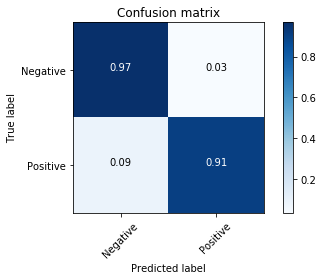

In [128]:
plot_confusion_matrix(cm=cm, classes=['Negative', 'Positive'], normalize=True)

In [129]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


GBDT+LR

In [130]:
gbdt = GradientBoostingClassifier(max_depth=3, n_estimators=n_estimator)
gbdt_enc = OneHotEncoder()
gbdt_lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [131]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [132]:
gbdt_enc.fit(gbdt.apply(X_train)[:,:,0])

C:\Users\huanglvjun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)

In [133]:
gbdt_lr.fit(gbdt_enc.transform(gbdt.apply(X_train_lr)[:,:,0]), y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
y_pred_gbdt_lr = gbdt_lr.predict_proba(gbdt_enc.transform(gbdt.apply(X_test)[:,:,0]))[:,1]
y_pred_gbdt_lr_c = gbdt_lr.predict(gbdt_enc.transform(gbdt.apply(X_test)[:,:,0]))

In [135]:
roc_auc_score(y_test, y_pred_gbdt_lr)

0.9819988523542708

In [136]:
cm = confusion_matrix(y_test, y_pred_gbdt_lr_c)

Confusion matrix, without normalization
[[19637   448]
 [ 1898 18017]]


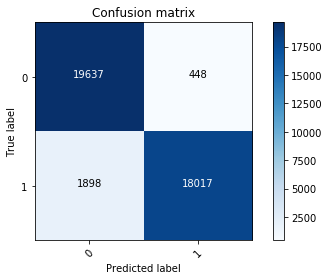

In [137]:
plot_confusion_matrix(cm=cm, classes=['0','1'])

In [138]:
xgb_model = xgb.XGBClassifier(nthread=2, n_estimators=50, learning_rate=0.08, max_depth=5, subsample=0.9, colsample_bytree=0.5, gamma=0)
xgb_enc = OneHotEncoder()
xgb_lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [139]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=2, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [140]:
xgb_enc.fit(xgb_model.apply(X_train))

C:\Users\huanglvjun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)

In [141]:
xgb_lr.fit(xgb_enc.transform(xgb_model.apply(X_train_lr)), y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
y_pred_xgb_lr = xgb_lr.predict_proba(xgb_enc.transform(xgb_model.apply(X_test)))[:,1]

In [143]:
y_pred_xgb_lr_c = xgb_lr.predict(xgb_enc.transform(xgb_model.apply(X_test)))

In [144]:
roc_auc_score(y_test, y_pred_xgb_lr_c)

0.9432346184252953

In [145]:
cm = confusion_matrix(y_test, y_pred_xgb_lr_c)

Confusion matrix, without normalization
[[19372   713]
 [ 1554 18361]]


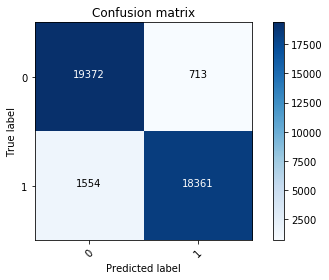

In [146]:
plot_confusion_matrix(cm=cm, classes=['0', '1'])